## Description

In this notebook, we want to recognize the objects in the image using pre-trained models. We are not going to fine-tune the data training models or make any changes in their structure. The used models are fasterRCNN, RetinaNet, SSD and FCOS. You can give any other image to the 'object_detection' function to perform object detection using these models. The code is programmed in Python language and uses PyTorch and TorchVision library.

Object detection is a computer vision technique that works to identify and locate objects within an image or video. Specifically, object detection draws bounding boxes around these detected objects, which allow us to locate where said objects are in (or how they move through) a given scene. [fritz.ai]

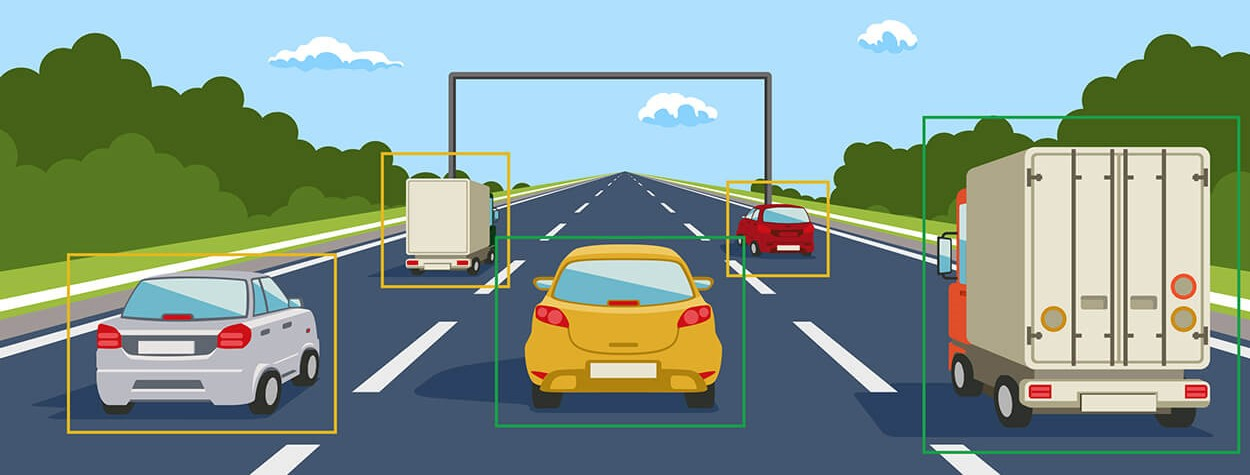

###### packages version
python: 3.9.18

torch: 2.1.0

torchvision: 0.16.0

## Library

In [1]:
import torch
import torch.nn as nn
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import torchvision
from torchvision import models

## Model

In [2]:
class Model(nn.Module):
    def __init__(self, model_name):
        super().__init__()
        ssd_model= models.detection.ssdlite320_mobilenet_v3_large(
            weights= models.detection.ssdlite.SSDLite320_MobileNet_V3_Large_Weights.DEFAULT)
        
        retina_model= models.detection.retinanet_resnet50_fpn(
            weights= models.detection.retinanet.RetinaNet_ResNet50_FPN_Weights.DEFAULT)

        faster_rcnn_model= models.detection.fasterrcnn_resnet50_fpn(
            weights= models.detection.faster_rcnn.FasterRCNN_ResNet50_FPN_Weights.DEFAULT)
        
        fcos_model= models.detection.fcos_resnet50_fpn(
            weights= models.detection.fcos.FCOS_ResNet50_FPN_Weights.DEFAULT)
        
        if model_name== 'faster_rcnn':
            self.model= faster_rcnn_model
        elif model_name== 'retina':
            self.model= retina_model
        elif model_name== 'ssd':
            self.model= ssd_model
        elif model_name== 'fcos':
            self.model= fcos_model
        else:
            raise Exception("The entered model name is not correct. \n \
                             Try one of the following options: \n \
                             faster_rcnn \n retina \n ssd \n fcos")
        
    def forward(self, x):
        x= self.model(x)
        return x

## Original Image

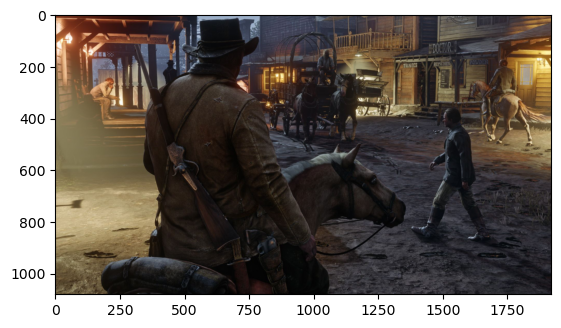

In [3]:
img_path= r'./sample-image.jpg'
img= Image.open(img_path).convert('RGB')
img = torchvision.transforms.functional.to_tensor(img)
img = [img]
img= img[0].permute(1,2,0).numpy()
plt.imshow(img)

## Object Detection

In [4]:
colors_code= ['#800080', '#F5FFFA','#FF00FF', '#000080', '#008080', 
              '#00FFFF', '#008000', '#00FF00', '#808000', '#FFFF00', 
              '#800000', '#0000FF', '#FF0000', '#000000', '#FFFFFF', 
              '#25383C', '#728C00', '#FFF0DB', '#FFE87C', '#CA762B', 
              '#3B2F2F', '#FF6700', '#CD5C5C', '#3F000F', '#B666D2', 
              '#665D1E', '#614051', '#6667AB', '#DCD0FF', '#EAEEE9']

In [5]:
def object_detection(image_path, model_name= 'faster_rcnn', min_score= 0.80):
    ## load image
    img= Image.open(img_path).convert('RGB')
    img = [torchvision.transforms.functional.to_tensor(img)]
    plt.imshow(img[0].permute(1,2,0).numpy())
    ## model 
    model= Model(model_name)
    model.eval()
    with torch.no_grad():
        prediction= model(img)
    ## plot boxes
    boxes= prediction[0]['boxes']
    labels= prediction[0]['labels']
    scores= prediction[0]['scores']
    ax = plt.gca()
    for box, label, score in zip(boxes, labels, scores):
        box = box.cpu().numpy()
        if score > min_score:
            rect = Rectangle((box[0], box[1]),
                             (box[2] - box[0]),
                             (box[3] - box[1]),
                             fill=False,
                             edgecolor= colors_code[(label%30)],
                             linewidth=1.5)
            ax.add_patch(rect)
    plt.show()

## Faster RCNN

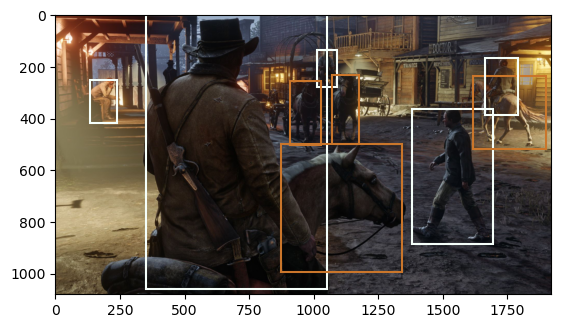

In [6]:
object_detection(img_path, model_name= 'faster_rcnn')

## Retina

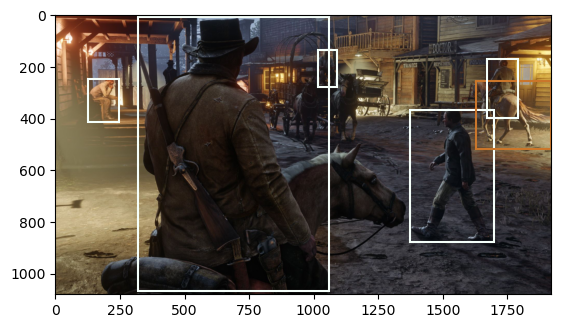

In [7]:
object_detection(img_path, model_name= 'retina', min_score= 0.65)

## SSD

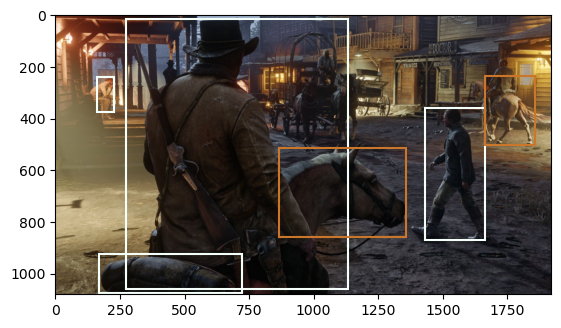

In [8]:
object_detection(img_path, model_name= 'ssd', min_score= 0.2)

## FCOS

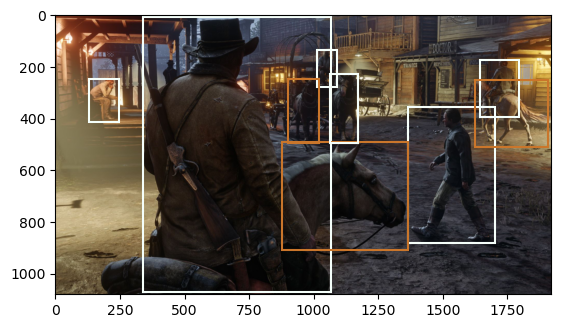

In [9]:
object_detection(img_path, model_name= 'fcos', min_score= 0.5)